In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
os.getcwd()

'C:\\Users\\ADMIN'

### DATA IMPORT

In [ ]:
bigmart=pd.read_csv(r"C:\Users\ADMIN\train_bigmart.csv")
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## DATA DESCRIPTION

Data source:Kaggel


Overview: This Data consist of differet Item(product) sale in various outlet of bigmart superstore. its a merge data set contain outlet describe and product describe columns.columns information is given below,
product number and outlet number combine gives us primary key for this dataset.


- Item_Identifier: Unique identifier for Item sold
- Item_Weight: Weight of Item sold
- Item_Fat_Content: Fat contain information of item sold
- Item_Visibility: The percentage of total display area that the product occupies in the store
- Item_Type: Type of item
- Item_MRP: Price of Item
- Outlet_Identifier: Unique identifier for outlet in which underlying item sold
- Outlet_Establishment_Year: Establishment yar of outlier
- Outlet_Size: size of outlet
- Outlet_Location_Type: The location type of the store.
- Outlet_Type: The Type of outlet
- Item_Outlet_Sales: Total sale for underlying item in underlying outlet



In [ ]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## MISSING VALUE TREATMENT

In [ ]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see above columns, there are null values present in item_Weight and Outlet_size, we have to either drop them or impute them before proceed further                 

In [ ]:
Outlet_size_null=list(bigmart[bigmart["Outlet_Size"].isnull()]["Outlet_Identifier"].unique())
print("Outlet number for which outlet size is not defined are ",Outlet_size_null)

Outlet number for which outlet size is not defined are  ['OUT010', 'OUT045', 'OUT017']


In [ ]:
bigmart[["Outlet_Identifier","Outlet_Type","Outlet_Location_Type","Outlet_Size"]].drop_duplicates()

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Size
0,OUT049,Supermarket Type1,Tier 1,Medium
1,OUT018,Supermarket Type2,Tier 3,Medium
3,OUT010,Grocery Store,Tier 3,NaN
4,OUT013,Supermarket Type1,Tier 3,High
7,OUT027,Supermarket Type3,Tier 3,Medium
8,OUT045,Supermarket Type1,Tier 2,NaN
9,OUT017,Supermarket Type1,Tier 2,NaN
11,OUT046,Supermarket Type1,Tier 1,Small
19,OUT035,Supermarket Type1,Tier 2,Small
23,OUT019,Grocery Store,Tier 1,Small


we can refer this table to impute outlet size, since Grocery Stores are of small size, we can imput size small for OUT010 outlet and same for remaining two outlet as supermarket_type_1 of Tier 2 location are of small size.its a assumption and need to crosscheck always as and when we get more data

In [ ]:
bigmart["Outlet_Size"]=np.where(bigmart["Outlet_Identifier"].isin(["OUT010","OUT045","OUT017"]),"Small",bigmart["Outlet_Size"])

In [ ]:
bigmart[["Item_Identifier","Item_Weight"]].drop_duplicates().sort_values(by='Item_Identifier')

,Item_Identifier,Item_Weight
118,DRA12,11.60
2879,DRA24,NaN
1148,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
1267,NCZ53,9.60
1896,NCZ54,NaN


We have gained item weight from other transactions occured,we can use weight from previous transaction of same item to impute missing weights, ffill method is useful for this type of imputation, it simply impute value of previous row in next null value

In [ ]:
bigmart["Item_Weight"]=bigmart.sort_values(by='Item_Identifier')["Item_Weight"].fillna(method="ffill")

In [ ]:
bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Missing value treatment is done

## OUTLIERS TREATMENT

An outlier is a data point that differs significantly from other observations

Boxplot is typically used to detect outliers in numeric column of dataset. observation above upper whisker or below lower whisker of boxplot is considered as outlier

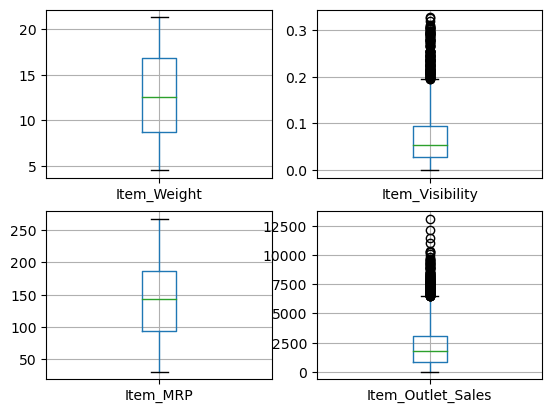

In [ ]:
plt.subplot(221)
boxplot = bigmart.boxplot(column=['Item_Weight'])

plt.subplot(222)
boxplot = bigmart.boxplot(column=['Item_Visibility'])

plt.subplot(223)
boxplot = bigmart.boxplot(column=['Item_MRP'])

plt.subplot(224)
boxplot = bigmart.boxplot(column=['Item_Outlet_Sales'])

Its clealy visible from above boxplots that there are outliers present in Item_Visibility and item_Outlet_Sales,To treat these outliers we will simply replace of these extreme value with upper whisker of boxplot since all outliers are greater than upper limit

In [ ]:
IQR_Outlet_Sales=bigmart["Item_Outlet_Sales"].quantile(0.75)-bigmart["Item_Outlet_Sales"].quantile(0.25)
IQR_Visibility=bigmart["Item_Visibility"].quantile(0.75)-bigmart["Item_Visibility"].quantile(0.25)

Upper_limit_Outlet_Sales = bigmart["Item_Outlet_Sales"].quantile(0.75) + (IQR_Outlet_Sales * 1.5)
Upper_limit_Visibility = bigmart["Item_Visibility"].quantile(0.75) + (IQR_Visibility * 1.5)

print("Upper limit for item_Outlet_Sales: ",Upper_limit_Outlet_Sales,end="\n")
print("Upper limit for Item_Visibility: ",Upper_limit_Visibility,end="\n")

Upper limit for item_Outlet_Sales:  6501.8699
Upper limit for Item_Visibility:  0.195979015


In [ ]:
bigmart["Item_Outlet_Sales"]=np.where(bigmart["Item_Outlet_Sales"]>Upper_limit_Outlet_Sales,Upper_limit_Outlet_Sales,bigmart["Item_Outlet_Sales"])
bigmart["Item_Visibility"]=np.where(bigmart["Item_Visibility"]>Upper_limit_Visibility,Upper_limit_Visibility,bigmart["Item_Visibility"])


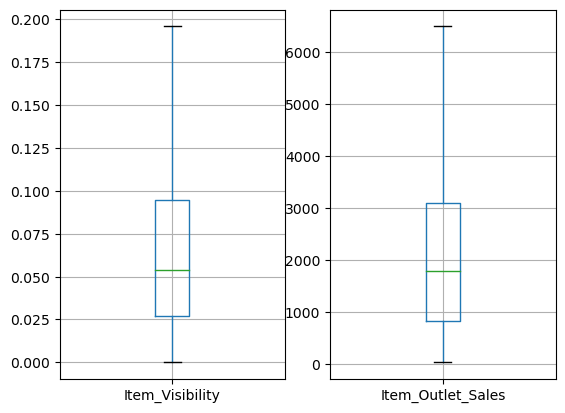

In [ ]:
plt.subplot(121)
boxplot = bigmart.boxplot(column=['Item_Visibility'])

plt.subplot(122)
boxplot = bigmart.boxplot(column=['Item_Outlet_Sales'])

Outliers from these two columns has been replaced by upper limit hence boxplot is not showing any outliers. outliers tretment is done